In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Enter name of pkl file without channel names
waveform_name = 'pulsedODMR' 
folder = os.path.join("C:\\", "qudi-hira", "saved_pulsed_assets", "waveform")

In [ ]:
os.listdir(folder)

[Errno 2] No such file or directory: 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\pulsedODMR_a_ch2.pkl'
[Errno 2] No such file or directory: 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\pulsedODMR_a_ch3.pkl'
[Errno 2] No such file or directory: 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\pulsedODMR_d_ch3.pkl'
[Errno 2] No such file or directory: 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\pulsedODMR_d_ch4.pkl'
[Errno 2] No such file or directory: 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\pulsedODMR_d_ch5.pkl'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
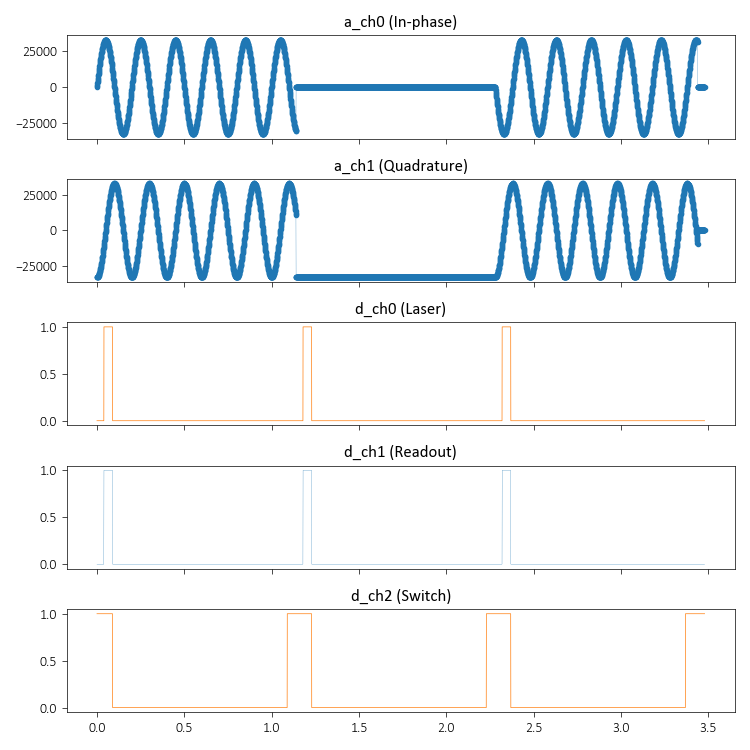

In [6]:
%matplotlib widget

keys = ['a_ch0', 'a_ch1', 'a_ch2', 'a_ch3', 'd_ch0', 'd_ch1', 'd_ch2', 'd_ch3', 'd_ch4', 'd_ch5']
labels = {
    'a_ch0': "In-phase", 
    'a_ch1': "Quadrature", 
    'a_ch2': "", 
    'a_ch3': "", 
    'd_ch0': "Laser", 
    'd_ch1': "Readout", 
    'd_ch2': "Switch", 
    'd_ch3': "", 
    'd_ch4': "", 
    'd_ch5': ""
}

# Initialize all channels to None
channels = dict.fromkeys(keys, None) 

for key in list(channels):
    try:
        filename = f"{waveform_name}_{key}.pkl"
        filepath = os.path.join(folder, filename)
        with open(filepath, 'rb') as f:
            channels[key] = pickle.load(f)
        if not np.any(channels[key]):
            # Delete channels with only zeros
            print(f'"{key}" is a null channel.')
            del channels[key]  
    except FileNotFoundError as exc:
        # Delete channels that don't exist on disk
        print(exc) 
        del channels[key]


if len(channels) == 1: # Single channel plotting
    size_x, size_y = 8, 5
else:
    size_x, size_y = len(channels) * 1.5, len(channels) * 1.5

fig, ax = plt.subplots(nrows=len(channels), sharex=True, figsize=(size_x, size_y))

# Correct for matplotlib's (silly) behavior for single plots
if not isinstance(ax, np.ndarray): 
    ax = [ax]

    
lower, upper = 0, 5000

for idx, key in enumerate(channels):
    #time_in_us = np.linspace(0, len(channels[key][:limit]) / 1.25e9, len(channels[key][limit:])) * 1e6
    time_in_us = np.linspace(0, len(channels[key][lower:upper]) / 1.25e9, len(channels[key][lower:upper])) * 1e6
    
    if key.startswith('a_'):
        ax[idx].plot(time_in_us, channels[key][lower:upper], ".-", linewidth=0.2, color="C0")
    elif key.startswith('d_ch1'):
        ax[idx].plot(time_in_us, channels[key][lower:upper], "-", linewidth=0.2, color="C0")
    else:
        ax[idx].plot(time_in_us, channels[key][lower:upper],"-", linewidth=0.5, color="C1")
    ax[idx].set_title(f'{key} ({labels[key]})')

fig.tight_layout()
#fig.savefig(os.path.join(folder, "pODMR.png"), dpi=600)

C:\Users\qudiamond\AppData\Local\Continuum\anaconda3\envs\jupyterlab\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\qudiamond\AppData\Local\Continuum\anaconda3\envs\jupyterlab\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\qudiamond\AppData\Local\Continuum\anaconda3\envs\jupyterlab\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\qudiamond\AppData\Local\Continuum\anaconda3\envs\jupyterlab\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
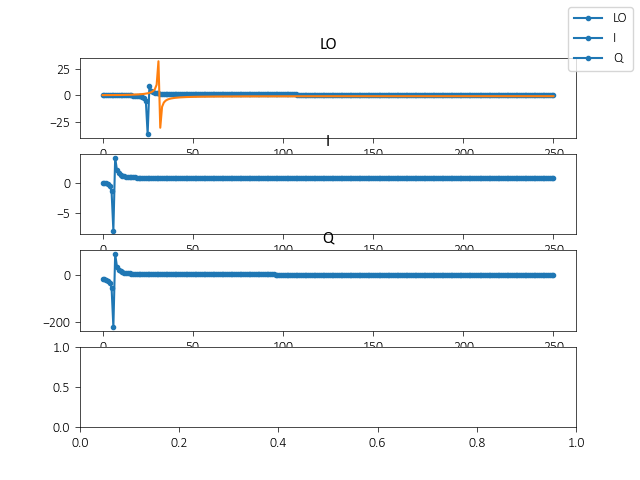

In [49]:
f_LO = 2
f_RF = -0.5

t = np.linspace(-2 * np.pi, 2 * np.pi, 500)

lo = np.sin(2 * np.pi * f_LO * t)
lo_90 = np.sin(2 * np.pi * f_LO * t + np.pi/2)

i = np.sin(2 * np.pi * f_RF * t)
q = np.sin(2 * np.pi * f_RF * t - np.pi/2)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
ax1.plot(np.fft.rfft(lo), ".-", label="LO")
ax1.set_title("LO")

ax2.plot(np.fft.rfft(i), ".-", label="I")
ax2.set_title("I")

ax3.plot(np.fft.rfft(q), ".-", label="Q")
ax3.set_title("Q")

ax1.plot(np.fft.rfft(lo_90 * i + lo * q), color="C1")

fig.legend()